# Ritz approximation for a discontinuous multiplication operator

In this notebook we show the Ritz approximation of the multiplication operator
$Mf = m(x)f(x)$ on $L^2(0, 1)$, where 
$$
m(x) \mapsto \begin{cases}
x & x < 1/2 \\
x + 1/2 & x > 1/2
\end{cases}
$$

The actual spectrum is $[0, 0.5]\cup[1, 1.5]$, and we will see spectral pollution
in the gap $[0.5, 1]$.

In [4]:
from specpol.ritz import ritz_bounded_L2, mult_sors
from specpol.algebra import create_m_op
from specpol.plot import plot_ritz

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# the symbol of our multiplication operator, m(x)
def step_slope(x):
    return x if x < 1 / 2 else x + 1 / 2

# `create_m_op` creates a multiplication operator with supplied symbol
step_operator = create_m_op(step_slope)

In [6]:
def plot(ritz_results):
    # here we modify the plot of the approximation to add bands
    # where we expect the spectrum to be

    fig, ax1, ax2 = plot_ritz(ritz_results)
    ax1.axhspan(0, 0.5, facecolor="green", alpha=0.2)
    ax1.axhspan(1, 1.5, facecolor="green", alpha=0.2)
    ax2.axvspan(0, 0.5, facecolor="green", alpha=0.2)
    ax2.axvspan(1, 1.5, facecolor="green", alpha=0.2)

    plt.show()

In [4]:
spec_step_slope = dict()

for i in tqdm(range(50, 175, 25)):
    spec_step_slope[i] = np.linalg.eigvals(ritz_bounded_L2(step_operator, 1, i, 321))

100%|██████████| 5/5 [01:16<00:00, 15.35s/it]


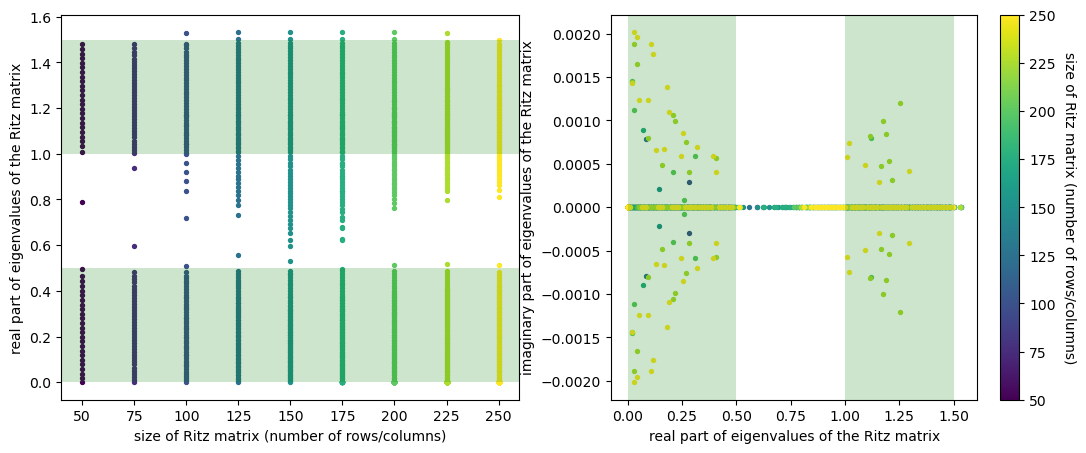

In [26]:
from matplotlib import colormaps
def plot_1(
    ritz_results) -> (plt.Figure, plt.Axes, plt.Axes):
    """Plot a Ritz approximation.

    Parameters
    ----------
    ritz_results: Dict[int, np.array]
        A dictionary with keys corresponding to Ritz matrix size, and
        values corresponding to the eigenvalues of the matrix of that size.
    dbm: int or None, default None
        If not None, removes all datapoints with imaginary part smaller
        than `dbm`.

    Returns
    -------
    Figure, Axes, Axes
        Returns the figure and its two subplots for further modification if desired.
    """
    specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(figsize=(13, 5))

    ax1 = fig.add_subplot(1, 2, 1, adjustable="box")
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax1.axhspan(0, 0.5, facecolor="green", alpha=0.2)
    ax1.axhspan(1, 1.5, facecolor="green", alpha=0.2)

plot(spec_step_slope)

In [23]:
from pyfilon import filon_fun_sin
from specpol.common import generate_matrix
import numpy as np

def ritz_bounded_L2_sin(
    operator, matrix_size: int, quad_mesh_size: int
) -> np.array:
    """Ritz approximation on L2(0, b) with sine functions.

    Parameters
    ----------
    operator: Operator
        The operator to approximate the spectrum of.
    b: float
        The upper limit of the domain.
    matrix_size: int
        The size of the square Ritz matrix.
    quad_mesh_size: int
        The size of the mesh used for quadrature.
        Must be an odd integer greater than 1.

    Returns
    -------
    np.array
        The Ritz matrix for the operator.
    """

    def onb_func(n: int):
        return lambda x: np.sin(np.pi*n*x)

    def integrand(n: int):
        return lambda x: 2 * operator(onb_func(n))(x)

    def entry_func(i: int, j: int) -> complex:
        """Calculate entry i,j of the Ritz matrix for the multiplication operator.

        These are the scalar products (M_f e_i, e_j)
        where e_k = 1/sqrt(2)sin(pi*n*x)
        """
        # the Filon quadrature has the second iexp as implicit
        return (
            filon_fun_sin(integrand(i), 0, 1, j * np.pi, quad_mesh_size)
        )

    ritz_matrix = generate_matrix(
        entry_func,
        matrix_size,
        start_index=0,
    )

    return ritz_matrix

In [24]:
spec_step_slope = dict()

for i in tqdm(range(50, 275, 25)):
    spec_step_slope[i] = np.linalg.eigvals(ritz_bounded_L2_sin(step_operator, i, 161))

100%|██████████| 9/9 [01:34<00:00, 10.46s/it]


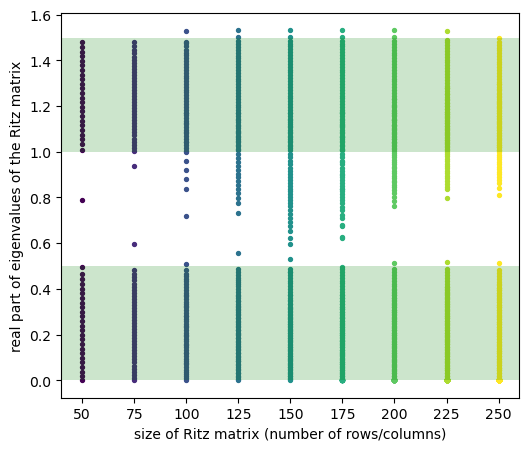

In [27]:
plot_1(spec_step_slope)